# Análise de Dados para a empresa House Rocket.

## A House Rocket é uma plataforma digital que tem como modelo de negócio, a compra e a venda de imóveis usando tecnologia.

## Quais questões esperam ser respondidas a partir dessa análise?
- Quantas casas tem um quarto?
- Quantas casas tem mais de um andar?
- Quantas casas estão boas ou em más condições?
- Quantos quartos, em média, as casas possuem?
- Qual o preço médio das casas?
- Qual o desvio padrão do preço?
- Existem casas com preços outliers?
- Quais são os 1Q e 3Q dos preços?

### Importando todas as bibliotecas que serão utilizadas:

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Lendo e mostrando parte do dataframe através da lib pandas:

In [85]:
dataFrame = pd.read_csv('./data/kc_house_data.csv')
dataFrame.columns =[column.replace(" ", "_") for column in dataFrame.columns]
dataFrame.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### **Quantas casas tem um quarto?**

#### Filtrando as casas com um e nenhum quarto:

In [86]:
house_with_one_bedrooms = dataFrame.query('bedrooms == 1').__len__()
house_with_none_bedrooms = dataFrame.query('bedrooms == 0').__len__()

#### Plotando a quantidade de casas que possuem um e nenhum quarto:

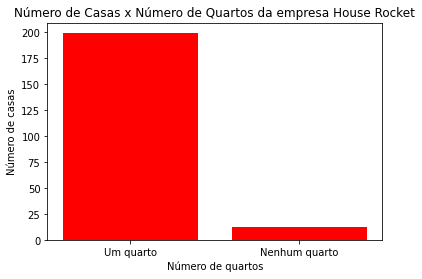

In [87]:
quartos = ['Um quarto', 'Nenhum quarto']
casas = [house_with_one_bedrooms, house_with_none_bedrooms]

plt.bar(quartos, casas, color="red")
plt.xticks(quartos)
plt.ylabel('Número de casas')
plt.xlabel('Número de quartos')
plt.title('Número de Casas x Número de Quartos da empresa House Rocket')
plt.show()

### **Quantas casas tem mais de um andar?**